In [ ]:
!pip install keras
!pip install tensorflow-gpu

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224, 3]

train_path = '/content/drive/MyDrive/Tomato/train'
valid_path = '/content/drive/MyDrive/Tomato/valid'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Tomato/train/*')

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
folders

['/content/drive/MyDrive/Tomato/train/Tomato___Late_blight',
 '/content/drive/MyDrive/Tomato/train/Tomato___Early_blight',
 '/content/drive/MyDrive/Tomato/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/Tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/Tomato/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/Tomato/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/Tomato/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/Tomato/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/Tomato/train/Tomato___healthy',
 '/content/drive/MyDrive/Tomato/train/Tomato___Septoria_leaf_spot']

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Tomato/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 18348 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Tomato/valid',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [ ]:
r = model.fit_generator( training_set,validation_data=test_set,epochs=10,steps_per_epoch=len(training_set),validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1147/1147 [==============================] - 5244s 5s/step - loss: 5.0315 - accuracy: 0.5980 - val_loss: 4.6697 - val_accuracy: 0.7213
Epoch 2/10
1147/1147 [==============================] - 251s 219ms/step - loss: 3.3766 - accuracy: 0.7814 - val_loss: 3.7395 - val_accuracy: 0.7860
Epoch 3/10
1147/1147 [==============================] - 251s 218ms/step - loss: 3.3725 - accuracy: 0.8164 - val_loss: 4.0196 - val_accuracy: 0.7985
Epoch 4/10
1147/1147 [==============================] - 250s 218ms/step - loss: 2.7915 - accuracy: 0.8458 - val_loss: 3.7278 - val_accuracy: 0.8312
Epoch 5/10
1147/1147 [==============================] - 250s 218ms/step - loss: 3.1106 - accuracy: 0.8438 - val_loss: 5.0105 - val_accuracy: 0.8100
Epoch 6/10
1147/1147 [==============================] - 250s 218ms/step - loss: 3.0639 - accuracy: 0.8573 - val_loss: 3.7677 - val_accuracy: 0.8356
Epoch 7/10
1147/1147 [==============================] - 250s 218ms/step - loss: 2.7642 - accuracy: 0.8719 - val_lo

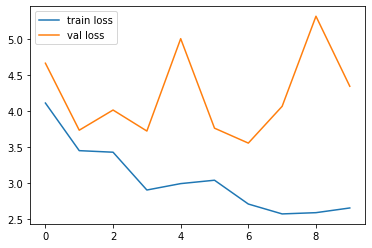

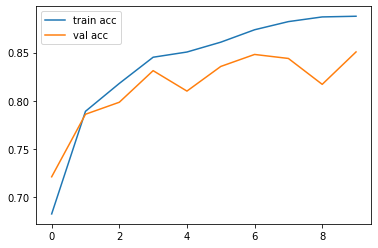

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')